4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 5s 17ms/step - loss: 0.6958 - val_loss: 0.6957
Epoch 2/5
235/235 [==============================] - 4s 18ms/step - loss: 0.6956 - val_loss: 0.6955
Epoch 3/5
235/235 [==============================] - 4s 19ms/step - loss: 0.6953 - val_loss: 0.6953
Epoch 4/5
235/235 [==============================] - 4s 19ms/step - loss: 0.6951 - val_loss: 0.6951
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


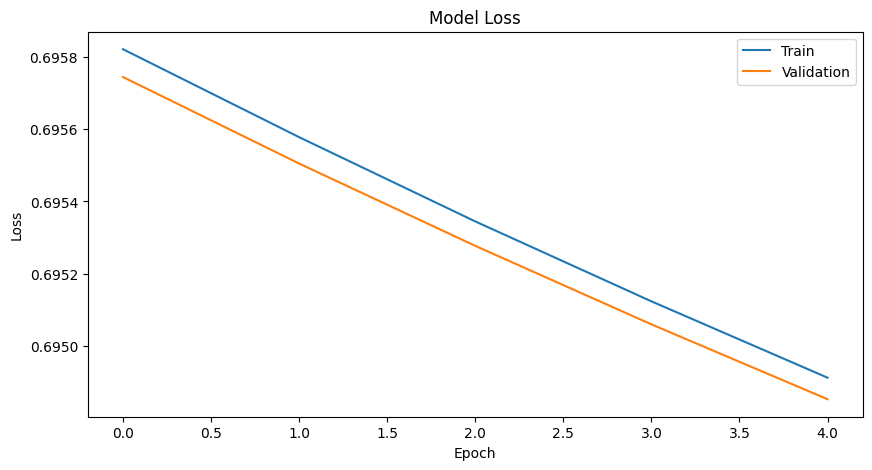

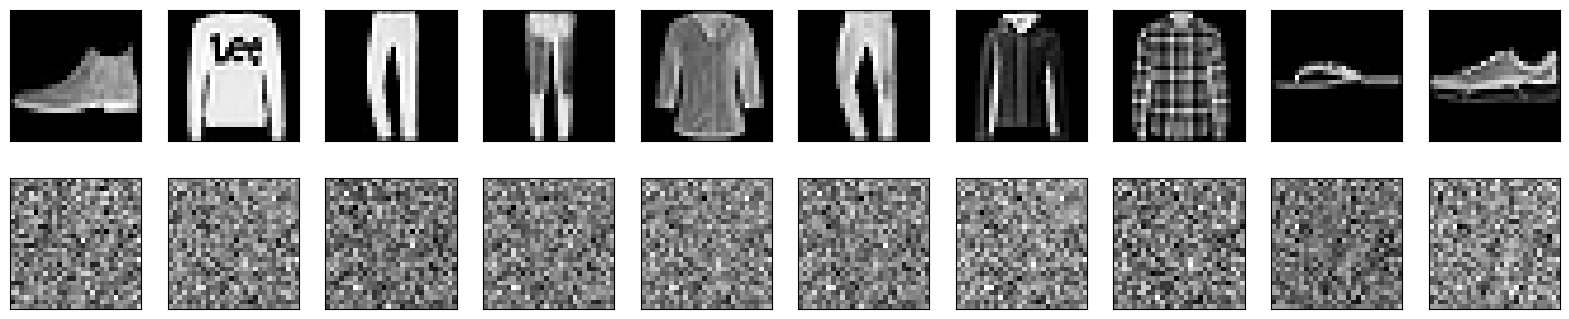

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# This model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=5,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Use the autoencoder to reconstruct the test images
decoded_imgs = autoencoder.predict(x_test)

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Number of images to display
n = 10

# Plot original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/10
235/235 [==============================] - 5s 17ms/step - loss: 0.6936 - val_loss: 0.6943
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6934 - val_loss: 0.6941
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6931 - val_loss: 0.6940
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6929 - val_loss: 0.6938
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6927 - val_loss: 0.6937
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6925 - val_loss: 0.6936
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6923 - val_loss: 0.6934
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6921 - val_loss: 0.6933
Epoch 9/10
235/235 [==============================] - 2s 11ms/step - loss: 0.6919 - val_loss: 0.6932
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


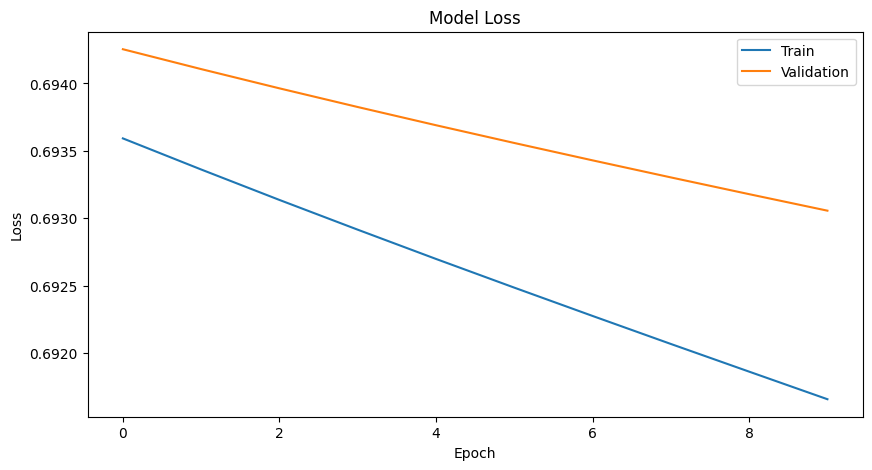

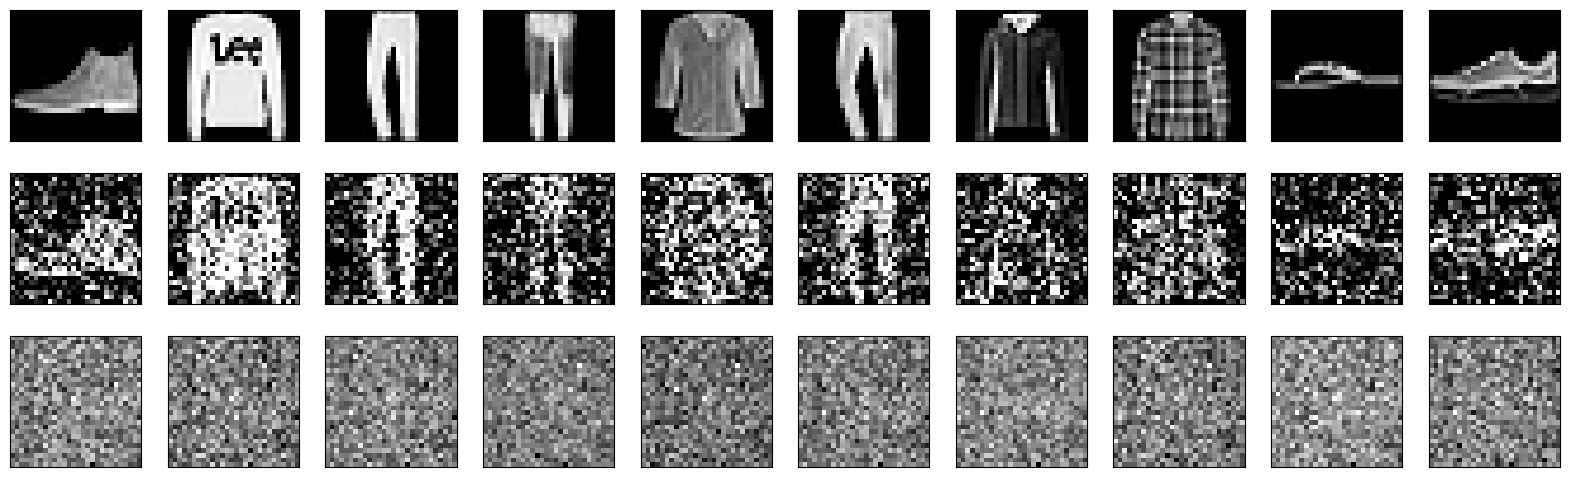

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# This model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_noisy))

# Use the autoencoder to reconstruct the test images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Number of images to display
n = 10

# Plot original, noisy, and reconstructed images
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
